# 📊 Spotify Wrapped – Data Analysis & Visualization

In [39]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

plt.style.use("default")
sns.set_context("notebook")


In [40]:

df = pd.read_csv("E:\MIT\Spotify_wrapped_app2\Liked_Songs (1).csv")
df.head()


,Track URI,Track Name,Album Name,Artist Name(s),Release Date,Duration (ms),Popularity,Explicit,Added By,Added At,...,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time Signature
0,spotify:track:4IvZLDtwBHmBmwgDIUbuwa,Here Comes Your Man,Doolittle,Pixies,1989-04-17,201186,74,False,NaN,2026-01-15T04:38:19Z,...,2,-10.865,1,0.0285,0.00772,0.078100,0.4010,0.882,124.594,4
1,spotify:track:5ihS6UUlyQAfmp48eSkxuQ,Landslide,Fleetwood Mac,Fleetwood Mac,1975-07-11,199493,87,False,NaN,2026-01-15T04:38:07Z,...,7,-22.320,0,0.0318,0.88300,0.000223,0.1170,0.423,159.375,4
2,spotify:track:0qRR9d89hIS0MHRkQ0ejxX,Rich Girl,Bigger Than Both Of Us,Daryl Hall & John Oates,1976-08-01,142786,78,False,NaN,2026-01-11T13:21:54Z,...,5,-6.644,1,0.1760,0.46100,0.000000,0.0935,0.817,169.519,4
3,spotify:track:52ksVOpMCbimktgmI59GSq,While My Guitar Gently Weeps - Live from Madis...,Let It Roll - Songs of George Harrison,George Harrison,2009-01-01,286733,55,False,NaN,2026-01-09T13:49:55Z,...,7,-6.552,1,0.0292,0.00341,0.010200,0.7420,0.686,134.245,4
4,spotify:track:5Ts1DYOuouQLgzTaisxWYh,Love Grows (Where My Rosemary Goes),Love Grows (Where My Rosemary Goes) & Other Gems,Edison Lighthouse,1970-01-01,174760,74,False,NaN,2026-01-05T03:48:42Z,...,9,-4.613,1,0.0299,0.40300,0.000000,0.0855,0.753,108.625,4


In [41]:

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Track URI         1001 non-null   object 
 1   Track Name        998 non-null    object 
 2   Album Name        998 non-null    object 
 3   Artist Name(s)    998 non-null    object 
 4   Release Date      1001 non-null   object 
 5   Duration (ms)     1001 non-null   int64  
 6   Popularity        1001 non-null   int64  
 7   Explicit          1001 non-null   bool   
 8   Added By          0 non-null      float64
 9   Added At          1001 non-null   object 
 10  Genres            790 non-null    object 
 11  Record Label      998 non-null    object 
 12  Danceability      1001 non-null   float64
 13  Energy            1001 non-null   float64
 14  Key               1001 non-null   int64  
 15  Loudness          1001 non-null   float64
 16  Mode              1001 non-null   int64  


In [42]:

df["Release Date"] = pd.to_datetime(df["Release Date"], errors="coerce")
df["Added At"] = pd.to_datetime(df["Added At"], errors="coerce")
df["Release Year"] = df["Release Date"].dt.year

df["Genres"] = df["Genres"].fillna("")
df["Genres_List"] = df["Genres"].apply(lambda x: [g.strip() for g in x.split(",") if g])


## Top Artists

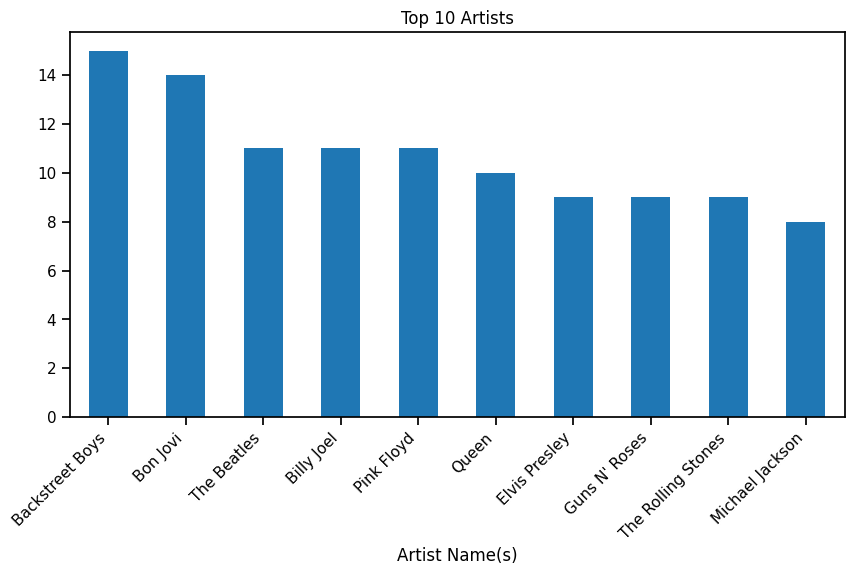

In [47]:

top_artists = df["Artist Name(s)"].value_counts().head(10)
top_artists.plot(kind="bar", figsize=(10,5), title="Top 10 Artists")
plt.xticks(rotation=45, ha="right")
plt.show()


## Top Albums

In [48]:
df["Release Year"].isna().sum()

np.int64(73)

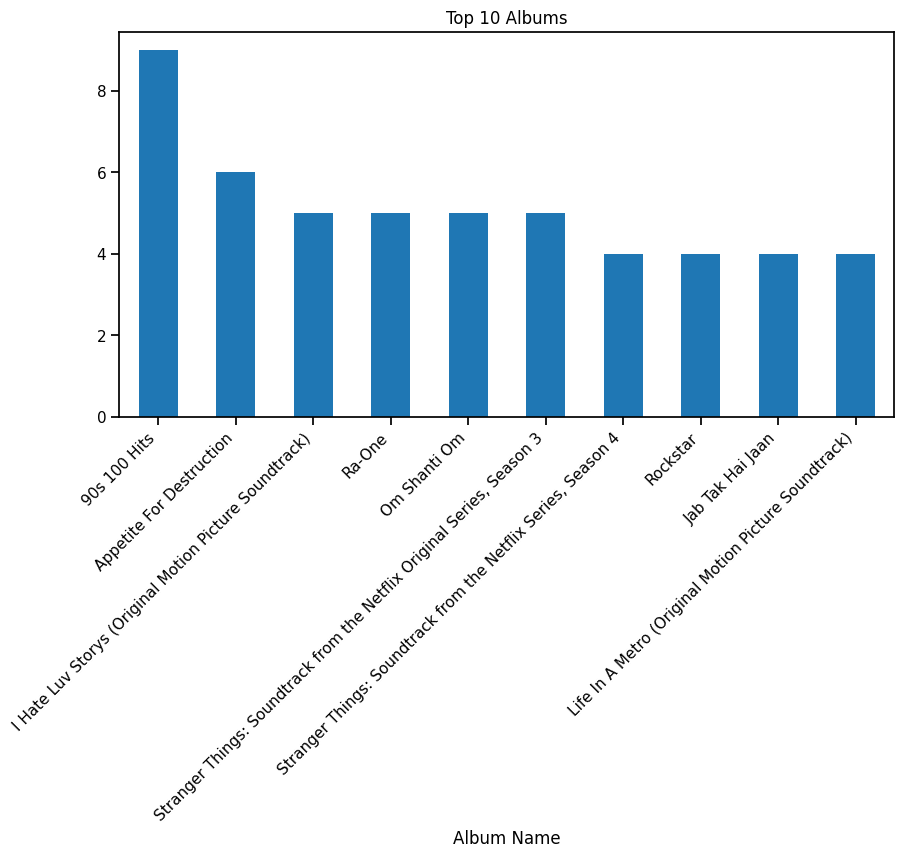

In [49]:

top_albums = df["Album Name"].value_counts().head(10)
top_albums.plot(kind="bar", figsize=(10,5), title="Top 10 Albums")
plt.xticks(rotation=45, ha="right")
plt.show()


## Top Genres

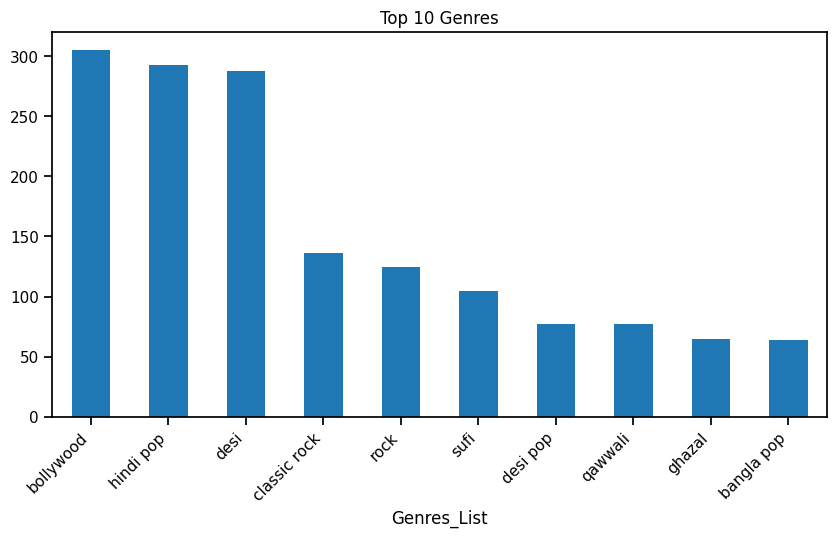

In [50]:

top_genres = df.explode("Genres_List")["Genres_List"].value_counts().head(10)
top_genres.plot(kind="bar", figsize=(10,5), title="Top 10 Genres")
plt.xticks(rotation=45, ha="right")
plt.show()


## Listener Age Estimation

In [51]:

current_year = datetime.now().year
df["age"] = current_year - df["Release Year"] 
median_release_year = df["Release Year"].mean()
listener_age_estimate = df["age"].mean()
print(listener_age_estimate)


23.01616379310345


## Popularity Analysis

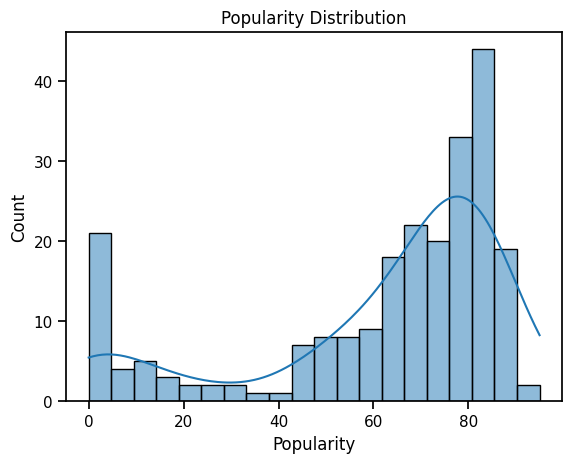

In [27]:

sns.histplot(df["Popularity"], bins=20, kde=True)
plt.title("Popularity Distribution")
plt.show()


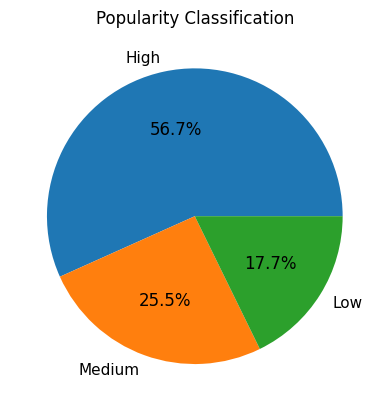

In [28]:

def popularity_class(p):
    if p >= 70:
        return "High"
    elif p >= 40:
        return "Medium"
    else:
        return "Low"

df["Popularity Class"] = df["Popularity"].apply(popularity_class)
df["Popularity Class"].value_counts().plot(kind="pie", autopct="%1.1f%%")
plt.title("Popularity Classification")
plt.ylabel("")
plt.show()


## Correlation Heatmap

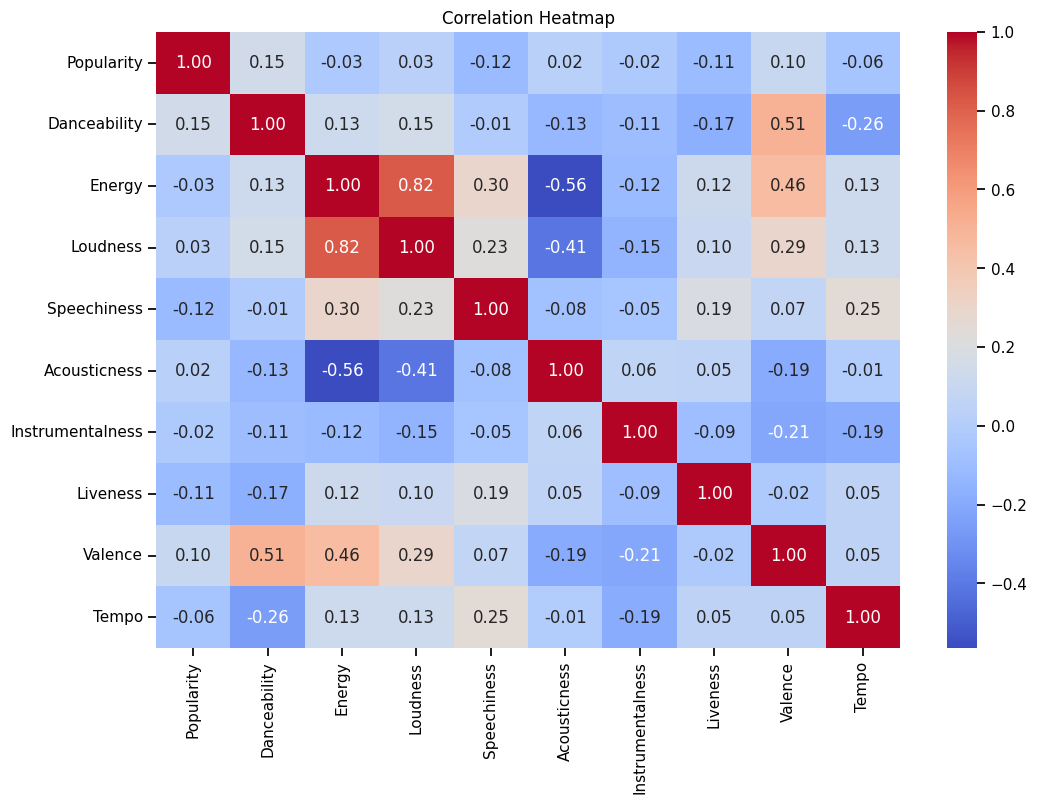

In [29]:

audio_features = [
    "Danceability", "Energy", "Loudness",
    "Speechiness", "Acousticness",
    "Instrumentalness", "Liveness",
    "Valence", "Tempo"
]

corr = df[["Popularity"] + audio_features].corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


## Mood Analysis

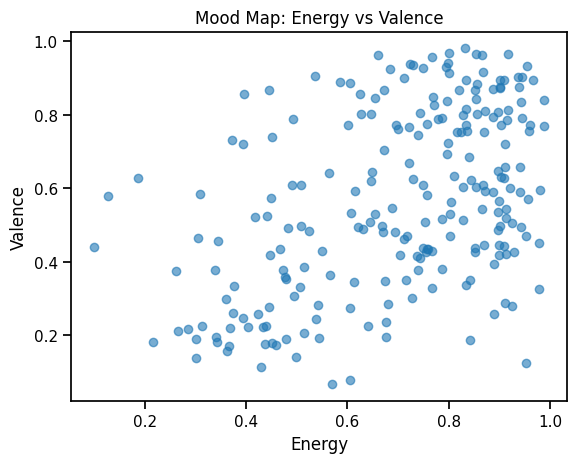

In [30]:

plt.scatter(df["Energy"], df["Valence"], alpha=0.6)
plt.xlabel("Energy")
plt.ylabel("Valence")
plt.title("Mood Map: Energy vs Valence")
plt.show()


## Explicit Content Analysis

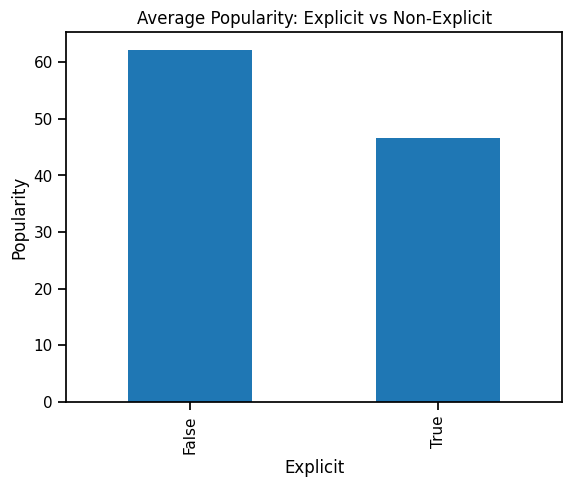

In [31]:

df.groupby("Explicit")["Popularity"].mean().plot(kind="bar")
plt.title("Average Popularity: Explicit vs Non-Explicit")
plt.ylabel("Popularity")
plt.show()


## Listening Trend Over Time

C:\Users\Admin\AppData\Local\Temp\ipykernel_4688\123564800.py:1: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df["Added Month"] = df["Added At"].dt.to_period("M")


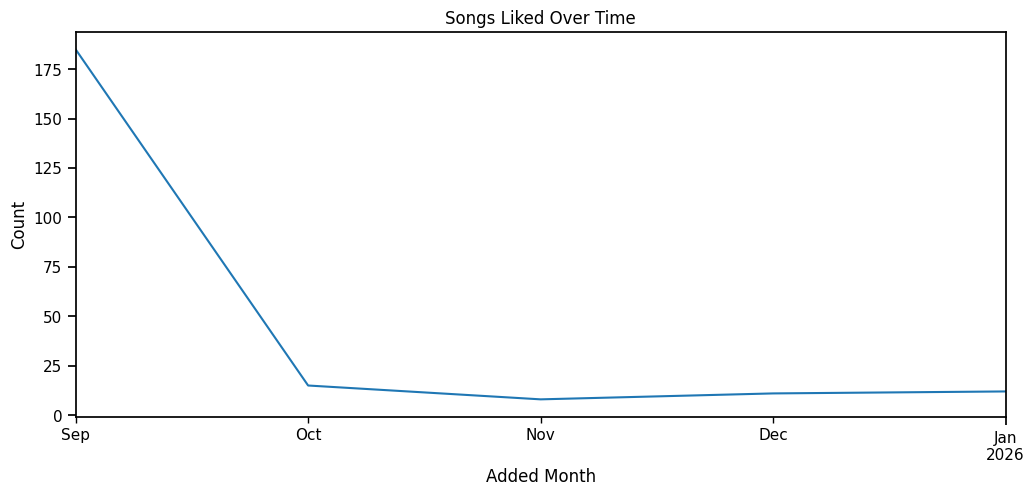

In [32]:

df["Added Month"] = df["Added At"].dt.to_period("M")
df.groupby("Added Month").size().plot(figsize=(12,5))
plt.title("Songs Liked Over Time")
plt.ylabel("Count")
plt.show()


## Audio Feature Profile

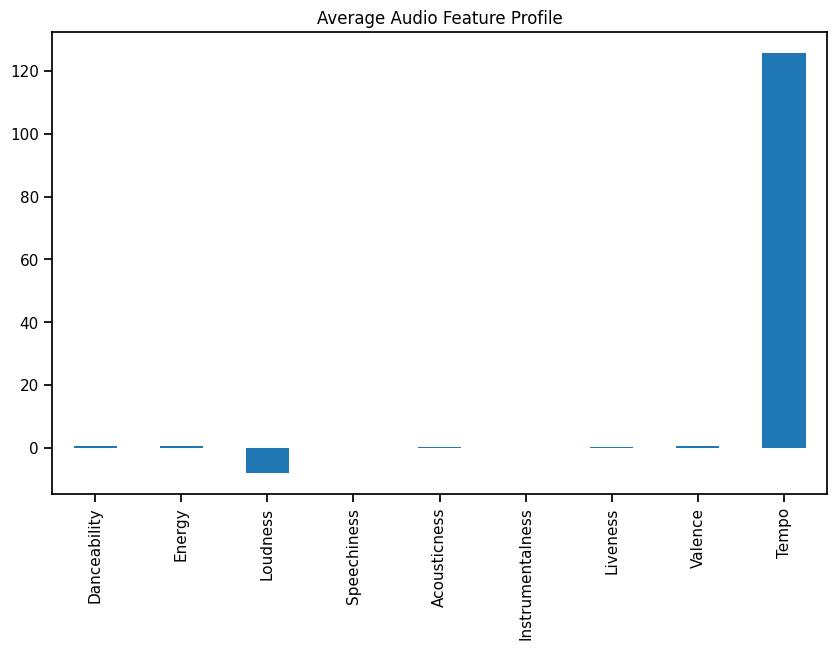

In [33]:

df[audio_features].mean().plot(kind="bar", figsize=(10,6))
plt.title("Average Audio Feature Profile")
plt.show()
